In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy as sp

In [58]:
eva = torch.load('/Users/markusfasching/EPFL/Work/project-SOAP/GeTe/EV_timescales/GeTe_eva_864_100.pt').numpy()[0,::-1]


/tmp/openmpi/ipykernel_36600/4104865443.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eva = torch.load('/Users/markusfasching/EPFL/Work/project-SOAP/GeTe/EV_timescales

In [77]:
eva = np.exp(-np.linspace(0, 10, 100))

In [78]:
def find_time(sigm, lamb, tau_min=1, tau_max=100, tau_delta=1):
    return (np.exp(-sigm*tau_min) - np.exp(-sigm*(tau_max+tau_delta)) )/(1-np.exp(-sigm*tau_delta)) - lamb


In [79]:
def sigma(lamb):
    sol=sp.optimize.root(find_time, np.ones(lamb.shape), args=(lamb, 2, 100, 1), method='lm')#,('tau_max',100),('tau_delta',1)))
    print(sol)
    #print(sol.x)
    return sol.x

In [ ]:
#print(eva[0] - sigma(eva[0]))


/tmp/openmpi/ipykernel_36600/4022189902.py:2: RuntimeWarning: overflow encountered in exp
  return (np.exp(-sigm*tau_min) - np.exp(-sigm*(tau_max+tau_delta)) )/(1-np.exp(-sigm*tau_delta)) - lamb


[-9.33665894e+01 -1.27272877e+00 -1.14829494e+00 -1.12508988e+00
 -1.06780556e+00 -1.05633970e+00 -1.05363030e+00 -1.03712071e+00
 -1.02779656e+00 -1.02299417e+00 -1.01752422e+00 -1.01305194e+00
 -1.01152090e+00 -1.00943486e+00 -1.00731582e+00 -1.00614797e+00
 -1.00499496e+00 -1.00436239e+00 -1.00355536e+00 -1.00279208e+00
 -1.00219655e+00 -1.00190907e+00 -1.00176744e+00 -1.00134002e+00
 -1.00125681e+00 -1.00092179e+00 -1.00063678e+00 -1.00052766e+00
 -1.00037201e+00 -1.00027600e+00 -1.00018140e+00 -1.00016444e+00
 -1.00013630e+00 -1.00010573e+00 -1.00009039e+00 -1.00008530e+00
 -1.00005351e+00 -1.00004516e+00 -1.00004274e+00 -1.00003662e+00
 -1.00002914e+00 -1.00002689e+00 -1.00001734e+00 -1.00001425e+00
 -1.00001248e+00 -1.00000827e+00 -1.00000770e+00 -1.00000734e+00
 -1.00000386e+00 -1.00000272e+00 -1.00000203e+00 -1.00000168e+00
 -1.00000138e+00 -1.00000093e+00 -1.00000068e+00 -1.00000049e+00
 -1.00000033e+00 -1.00000030e+00 -1.00000029e+00 -1.00000023e+00
 -1.00000014e+00 -1.00000

 message: The relative error between two consecutive iterates is at most 0.000000
 success: True
  status: 2
     fun: [ 2.220e-16 -1.110e-16 ...  6.776e-21  2.711e-20]
       x: [ 4.812e-01  5.096e-01 ...  4.953e+00  5.003e+00]
   cov_x: [[ 7.639e-02  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.000e+00  9.964e-02 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  9.840e+07  0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  1.205e+08]]
  method: lm
    nfev: 1620
    fjac: [[ 3.618e+00 -0.000e+00 ... -0.000e+00 -0.000e+00]
           [ 0.000e+00  3.168e+00 ... -0.000e+00 -0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.008e-04 -0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  9.111e-05]]
    ipvt: [  1   2 ...  99 100]
     qtf: [ 1.110e-16  1.110e-16 ... -6.975e-17 -4.396e-16]


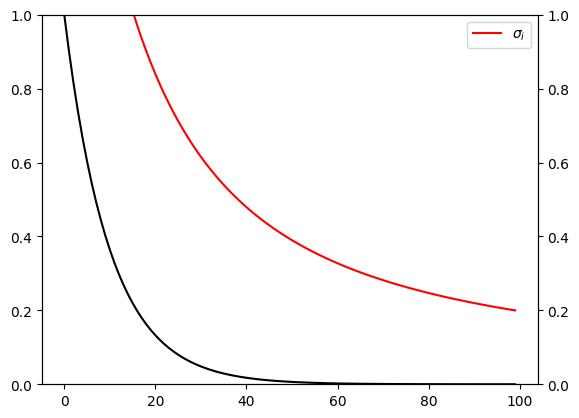

In [80]:
fig, ax = plt.subplots(1,1)
ax.plot(eva, c='black', label=r'$\lambda_i$')
ax2 = ax.twinx()
ax2.plot(1/sigma(eva), c='red', label=r'$\sigma_i$')
ax2.set_ylim(0,1)
ax.set_ylim(0,1)
plt.legend()
plt.show()

In [ ]:
# TODO IVAC INTERPRETATION CODE, WHERE DOES THE ERROR COME FROM/ WHAT ARE THE TIMESCALES IN OUR SYSTEM
# AND WHAT HAPPENS TO OUR DESCRIPTORS WHEN LABELLING CERTAIN STATES